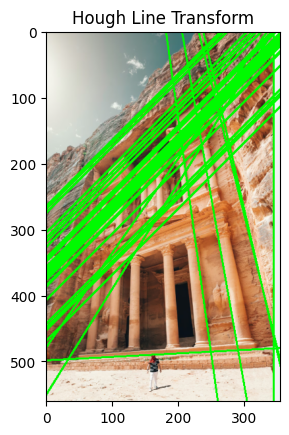

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('1.png')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Perform Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 198)

# Draw lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))




    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 250, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Transform')
plt.show()


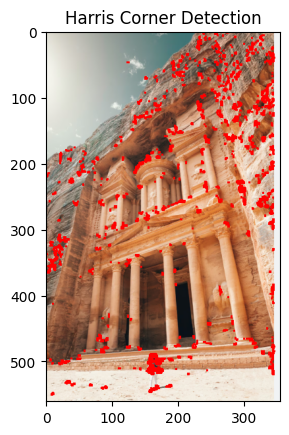

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert grayscale image to float32
gray = np.float32(gray)

# Apply Harris corner detection
dst = cv2.cornerHarris(gray, 3, 7, 0.04)

# Dilate the corners to make them visible
dst = cv2.dilate(dst, None)

# Threshold to mark corners
image[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()


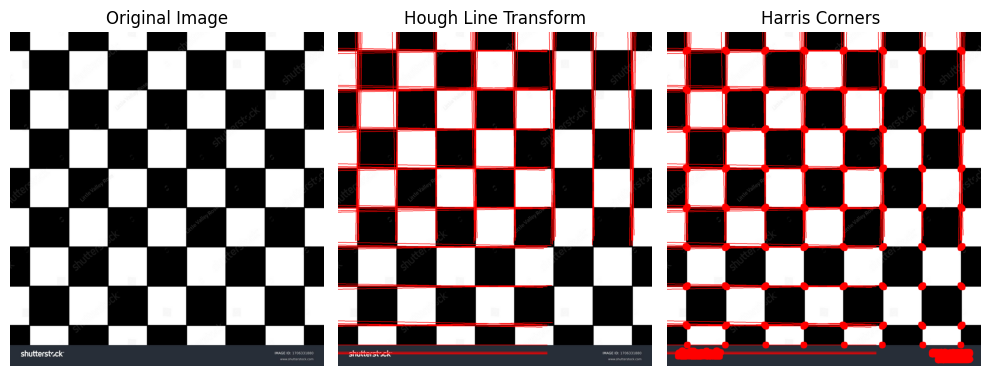

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('square.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Edge detection using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Step 2: Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 120,5,10)

# Draw the lines on a copy of the original image
line_image = image.copy()

# If lines were detected, draw them on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color for lines

# Step 3: Apply Harris Corner Detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 10, 3, 0.04)

# Dilate the corners to make them more visible
dst = cv2.dilate(dst, None)

# Mark corners on the image
corner_image = line_image.copy()  # Use the image with lines as the base
threshold = 0.01 * dst.max()  # Adjust this value to detect more/less corners
for y in range(dst.shape[0]):
    for x in range(dst.shape[1]):
        if dst[y, x] > threshold:
            cv2.circle(corner_image, (x, y), 10, (0, 0, 255), -2)  # Larger red circle, -1 fills the circle

# Display the results
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Image with Hough lines
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Transform")
plt.axis('off')

# Image with Hough lines and Harris corners
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners ")
plt.axis('off')

plt.tight_layout()
plt.show()


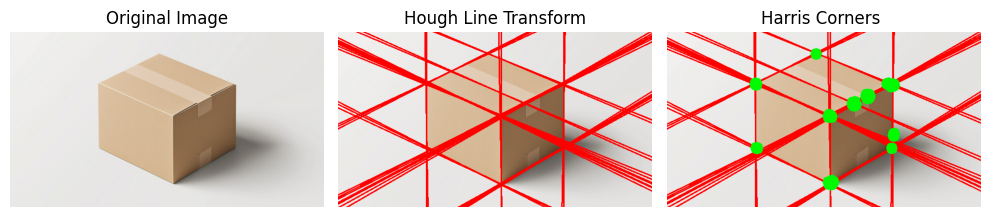

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('box.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Edge detection using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Step 2: Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 60)

# Draw the lines on a copy of the original image
line_image = image.copy()

# If lines were detected, draw them on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color for lines

# Step 3: Apply Harris Corner Detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 5, 9, 0.03)

# Dilate the corners to make them more visible
dst = cv2.dilate(dst, None)

# Mark corners on the image
corner_image = line_image.copy()  # Use the image with lines as the base
threshold = 0.0018 * dst.max()  # Adjust this value to detect more/less corners
for y in range(dst.shape[0]):
    for x in range(dst.shape[1]):
        if dst[y, x] > threshold:
            cv2.circle(corner_image, (x, y), 10, (0, 250, 0), -2)  # Larger red circle, -1 fills the circle

# Display the results
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Image with Hough lines
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Transform")
plt.axis('off')

# Image with Hough lines and Harris corners
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners ")
plt.axis('off')

plt.tight_layout()
plt.show()
